In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

In [23]:
middel_frame = clip_info['start_frame'] + (clip_info['stop_frame'] - clip_info['start_frame']) // 2
clip_frames = (middel_frame - 30 // 2, middel_frame + 30 // 2)
clip_paths = ['home/' + 'frame_' + str(x).rjust(10, '0') + '.jpg' for x in range(clip_frames[0], clip_frames[1])]

In [24]:
for path in clip_paths:
    print(path)
    break

home/frame_0000000090.jpg


In [25]:
x = torch.rand((1920, 1080, 3)).unsqueeze(-1)
y = torch.rand((1920, 1080, 3)).unsqueeze(-1)
z = torch.rand((1920, 1080, 3)).unsqueeze(-1)

print(x.shape)

torch.Size([1920, 1080, 3, 1])


In [26]:
lst = [x, y, z]
v = torch.cat(lst, -1)
print(v.shape)

torch.Size([1920, 1080, 3, 3])


In [27]:
x = torch.rand((640, 640, 3))
x
resize = T.Resize(size=(224,224))
x_resized = resize(x)
print(x_resized.shape)

torch.Size([640, 224, 224])


In [28]:
missing_frames = 7

# check if missing frames is odd in order to ensure that after padding, 
# num_frames equals NUM_FRAMES
if missing_frames % 2 == 0:
    print('1')
    pad = (missing_frames // 2, missing_frames // 2)
else:
    print('2')
    pad = (missing_frames // 2 + 1, missing_frames // 2)
print(f'pad: {pad}')
video = F.pad(v, pad, 'constant', 0)
print(video.shape)

2
pad: (4, 3)
torch.Size([1920, 1080, 3, 10])


In [29]:
# pool of size=3, stride=2
v1 = rearrange(video, 'c w h t -> c (w h) t')
print(f'v1 shape: {v1.shape}')
total = 10
num = 3
s = (total - 1)//(num - 1)
print(f'stride: {s}')
m = torch.nn.MaxPool1d(kernel_size = 2, stride=s)
output = m(v1)
output = rearrange(output, 'c (w h) t -> c w h t', h = 1080)
print(output.shape)

v1 shape: torch.Size([1920, 3240, 10])
stride: 4
torch.Size([1920, 3, 1080, 3])


In [30]:
a = 1920 * 1080
a

2073600

### Test results

In [4]:
RESULTS_CSV = 'labels_nystromformer_1.csv'

In [5]:
with open(RESULTS_CSV) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for i, row in enumerate(csv_reader):
        list_labels = []
        for cell in row:
            list_labels.append(int(cell))
        if i == 0:
            predicted = list_labels
        else:
            labels = list_labels

In [6]:
predicted_ds = pd.Series(predicted)
labels_ds = pd.Series(labels)

In [7]:
labels_ds.value_counts()

0    96
1    81
2    62
3    41
Name: count, dtype: int64

In [8]:
predicted_ds.unique()

array([0, 2, 1, 3], dtype=int64)

In [9]:
predicted_ds.value_counts()

0    143
2     84
3     31
1     22
Name: count, dtype: int64

<Axes: title={'center': 'predicted labels'}, xlabel='Label', ylabel='Frequency'>

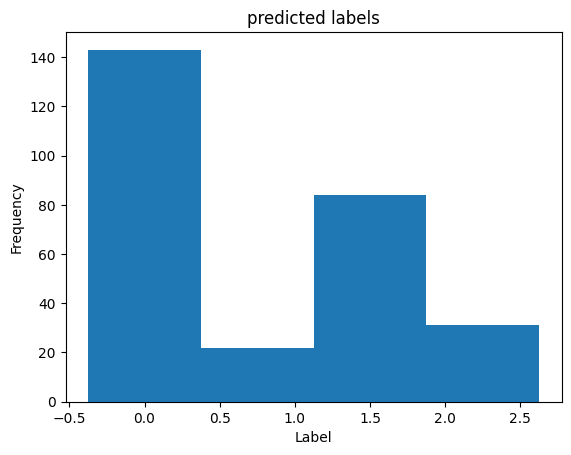

In [10]:
predicted_ds.plot(kind='hist', bins=4, title='predicted labels', xlabel='Label', align='left') # xticks=[x for x in range(21)]

In [11]:
labels_ds.value_counts()

0    96
1    81
2    62
3    41
Name: count, dtype: int64

<Axes: title={'center': 'true labels'}, xlabel='Label', ylabel='Frequency'>

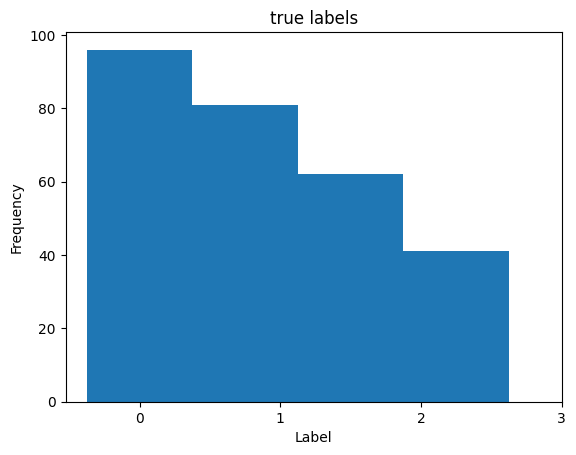

In [12]:
labels_ds.plot(kind='hist', bins=4, title='true labels', xticks=[x for x in range(4)], xlabel='Label', align='left')

In [13]:
confusion_mat = confusion_matrix(labels, predicted, labels=[x for x in range(4)], sample_weight=None, normalize=None)

In [14]:
confusion_mat

array([[54,  5, 21, 16],
       [54,  9, 11,  7],
       [14,  3, 44,  1],
       [21,  5,  8,  7]], dtype=int64)

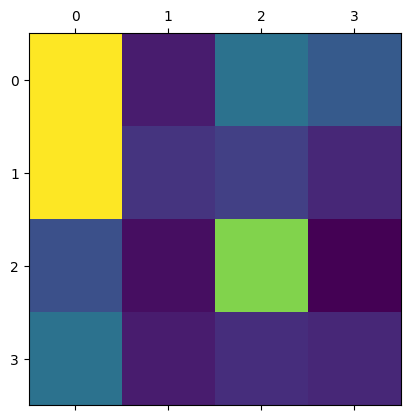

In [15]:
plt.matshow(confusion_mat[0:10, 0:10])